In [ ]:
#%pip install random-survival-forest
#%pip install scikit-survival

In [ ]:
import pandas as pd
# data = pd.read_csv('encoded_values_2.csv')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px #for histogram
sns.set(style="whitegrid")

In [ ]:
# pip install lifelines

In [ ]:
# pip install lifelines

In [ ]:
import random
import pandas as pd
from lifelines import CoxPHFitter, KaplanMeierFitter

np.random.seed(45)
# Define lists for different fields
genders = ['Male', 'Female']
churns = ['Yes', 'No']
residences = ['Off-campus', 'On-campus']
usage_frequency = ['Daily', 'Several times a week', 'Occasionally', 'Rarely', 'Never']
network_strength = [1, 2, 3, 4, 5]
services_used = ['Voice Calls', 'Mobile data/Internet', 'SMS/Text messaging']
data_allowance_exhaustion = ['Yes', 'No']
other_networks = ['Yes', 'No']
considered_discontinuing = ['Yes', 'No']
reasons_for_discontinuing = ['Poor network quality/coverage', 'Insufficient data allowance', 'Unsatisfactory customer service', 'High costs/pricing']
monthly_data = ['0-2', '2-4', '4-6', '6-8', '8 and more']

# Define a function to generate synthetic responses
def generate_responses(num_responses):
    responses = []
    for _ in range(num_responses):
        gender = random.choices(genders, weights=[0.34, 0.66], k=1)[0]
        churn = random.choices(churns, weights=[0.05, 0.95], k=1)[0]
        residence = random.choices(residences, weights=[0.83, 0.17], k=1)[0]
        usage_frequency_value = random.choices(usage_frequency, weights=[0.494, 0.16, 0.21, 0.049, 0.086], k=1)[0]
        network_strength_value = random.choices(network_strength, weights=[0.25, 0.247, 0.333, 0.086, 0.025], k=1)[0]
        voice_calls_value = random.choices(['Yes', 'No'], weights=[0.815, 0.185], k=1)[0]
        mobile_data_internet_value = random.choices(['Yes', 'No'], weights=[0.865, 0.135], k=1)[0]
        sms_text_messaging_value = random.choices(['Yes', 'No'], weights=[0.51, 0.48], k=1)[0]
        data_allowance_exhaustion_value = random.choices(data_allowance_exhaustion, weights=[0.827, 0.173], k=1)[0]
        other_networks_values = random.choices(other_networks, weights=[0.90, 0.1], k=1)[0]
        # considered_discontinuing_value = random.choices(considered_discontinuing, weights=[0.84, 0.16], k=1)[0]
        monthly_data_usage = random.choices(monthly_data, weights=[0.05, 0.1, 0.05, 0.1, 0.7], k=1)[0]

        # poor_network_quality_coverage = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
        # # insufficient_data_allowance = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
        # unsatisfactory_customer_service = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
        # high_costs_pricing = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]
        poor_network_quality_coverage = random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
        # insufficient_data_allowance = random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
        unsatisfactory_customer_service = random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
        high_costs_pricing = random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]



        # Determine churn level
        churn_level = random.randint(1, 3) if churn == 'Yes' else 4

        responses.append([gender, churn, residence, usage_frequency_value, network_strength_value, voice_calls_value, mobile_data_internet_value, sms_text_messaging_value, data_allowance_exhaustion_value, other_networks_values, poor_network_quality_coverage, unsatisfactory_customer_service, high_costs_pricing, monthly_data_usage, churn_level])

    return responses

# Generate synthetic responses for a sample size of 338
sample_size = 338
responses = generate_responses(sample_size)

# Create a DataFrame from the synthetic responses
columns = ['Gender' ,'Churn', 'Residence', 'Usage_Freq', 'Network_Strength', 'Voice_Calls', 'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion','Multiple_Networks', 'Poor_Network_Quality_Coverage', 'Unsatisfactory_Customer_Service', 'High_Costs_Pricing', 'Monthly_Data_Usage', 'Churn_Level']

data = pd.DataFrame(responses, columns=columns)

# Display the DataFrame
(data.head())

# Optional: Save the synthetic responses to a CSV file
# data.to_csv('sampleData.csv', index=False)


,Gender,Churn,Residence,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage,Churn_Level
0,Male,No,On-campus,Daily,1,No,Yes,No,Yes,No,Yes,Yes,No,4-6,4
1,Female,No,Off-campus,Several times a week,3,Yes,Yes,No,Yes,Yes,Yes,No,Yes,2-4,4
2,Female,No,Off-campus,Daily,2,Yes,Yes,Yes,Yes,Yes,Yes,No,No,8 and more,4
3,Female,No,Off-campus,Never,3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,8 and more,4
4,Male,No,Off-campus,Daily,1,Yes,Yes,No,No,Yes,No,Yes,No,8 and more,4


In [ ]:
# import random
# import pandas as pd
# from lifelines import CoxPHFitter, KaplanMeierFitter

# np.random.seed(45)
# # Define lists for different fields
# genders = ['Male', 'Female']
# churns = ['Yes', 'No']
# residences = ['Off-campus', 'On-campus']
# usage_frequency = ['Daily', 'Several times a week', 'Occasionally', 'Rarely', 'Never']
# network_strength = [1, 2, 3, 4, 5]
# services_used = ['Voice Calls', 'Mobile data/Internet', 'SMS/Text messaging']
# data_allowance_exhaustion = ['Yes', 'No']
# other_networks = ['Yes', 'No']
# considered_discontinuing = ['Yes', 'No']
# reasons_for_discontinuing = ['Poor network quality/coverage', 'Insufficient data allowance', 'Unsatisfactory customer service', 'High costs/pricing']
# monthly_data = ['0-2', '2-4', '4-6', '6-8', '8 and more']

# # Define a function to generate synthetic responses
# def generate_responses(num_responses):
#     responses = []
#     for _ in range(num_responses):
#         gender = random.choices(genders, weights=[0.442, 0.558], k=1)[0]
#         churn = random.choices(churns, weights=[0.05, 0.95], k=1)[0]
#         residence = random.choices(residences, weights=[0.679, 0.321], k=1)[0]
#         usage_frequency_value = random.choices(usage_frequency, weights=[0.494, 0.16, 0.21, 0.049, 0.086], k=1)[0]
#         network_strength_value = random.choices(network_strength, weights=[0.25, 0.247, 0.333, 0.086, 0.025], k=1)[0]
#         voice_calls_value = random.choices(['Yes', 'No'], weights=[0.815, 0.185], k=1)[0]
#         mobile_data_internet_value = random.choices(['Yes', 'No'], weights=[0.84, 0.16], k=1)[0]
#         sms_text_messaging_value = random.choices(['Yes', 'No'], weights=[0.51, 0.48], k=1)[0]
#         data_allowance_exhaustion_value = random.choices(data_allowance_exhaustion, weights=[0.827, 0.173], k=1)[0]
#         other_networks_values = random.choices(other_networks, weights=[0.938, 0.062], k=1)[0]
#         considered_discontinuing_value = random.choices(considered_discontinuing, weights=[0.84, 0.16], k=1)[0]
#         monthly_data_usage = random.choices(monthly_data, weights=[0.05, 0.1, 0.15, 0.2, 0.5], k=1)[0]

#         # poor_network_quality_coverage = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
#         # # insufficient_data_allowance = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
#         # unsatisfactory_customer_service = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
#         # high_costs_pricing = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]
#         poor_network_quality_coverage = random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
#         # insufficient_data_allowance = random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
#         unsatisfactory_customer_service = random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
#         high_costs_pricing = random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]



#         # Determine churn level
#         churn_level = random.randint(1, 3) if churn == 'Yes' else 4

#         responses.append([gender, churn, residence, usage_frequency_value, network_strength_value, voice_calls_value, mobile_data_internet_value, sms_text_messaging_value, data_allowance_exhaustion_value, other_networks_values, poor_network_quality_coverage, unsatisfactory_customer_service, high_costs_pricing, monthly_data_usage, churn_level])

#     return responses

# # Generate synthetic responses for a sample size of 338
# sample_size = 338
# responses = generate_responses(sample_size)

# # Create a DataFrame from the synthetic responses
# columns = ['Gender' ,'Churn', 'Residence', 'Usage_Freq', 'Network_Strength', 'Voice_Calls', 'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion','Multiple_Networks', 'Poor_Network_Quality_Coverage', 'Unsatisfactory_Customer_Service', 'High_Costs_Pricing', 'Monthly_Data_Usage', 'Churn_Level']

# data = pd.DataFrame(responses, columns=columns)

# # Display the DataFrame
# (data.head())

# # Optional: Save the synthetic responses to a CSV file
# data.to_csv('sampleData.csv', index=False)


In [ ]:
# pip install ydata_profiling


In [ ]:
# from ydata_profiling import ProfileReport

# ProfileReport(data, title="Profiling Report")

In [ ]:
data.describe()

,Network_Strength,Churn_Level
count,338.000000,338.000000
mean,2.426036,3.920118
std,1.062792,0.410700
min,1.000000,1.000000
25%,2.000000,4.000000
50%,3.000000,4.000000
75%,3.000000,4.000000
max,5.000000,4.000000


In [ ]:
data.describe(include=["object", "bool"]) # For non-numeric


,Gender,Churn,Residence,Usage_Freq,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
count,338,338,338,338,338,338,338,338,338,338,338,338,338
unique,2,2,2,5,2,2,2,2,2,2,2,2,5
top,Female,No,Off-campus,Daily,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,8 and more
freq,238,324,284,149,257,301,186,280,306,210,211,179,243


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

missing_values


,0
Gender,0
Churn,0
Residence,0
Usage_Freq,0
Network_Strength,0
Voice_Calls,0
Mobile_Data_Internet,0
SMS_Text_Messaging,0
Data_Exhaustion,0
Multiple_Networks,0


In [ ]:

pd.crosstab(data["Churn"], data["Gender"], margins=True)


Gender,Female,Male,All
Churn,,,
No,230,94,324
Yes,8,6,14
All,238,100,338


In [ ]:

color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Residence",  title="<b>Churn distribution by Residence</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions of Students",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
import plotly.graph_objects as go

labels = data['Usage_Freq'].unique()
values = data['Usage_Freq'].value_counts()

# Define explode values; set non-zero values for the slices you want to explode
explode = [0.1 if label in ['Rarely', 'Daily'] else 0 for label in labels]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             hole=.5, pull=explode,
                             textposition='outside')])

fig.update_layout(title_text="<b>Usage Frequency Distribution</b>")

fig.show()


In [ ]:
# plt.figure(figsize=(25, 10))
# corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
# # sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


In [ ]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
# Get all the categorical columns
category_feature = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in category_feature:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])

    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])

        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


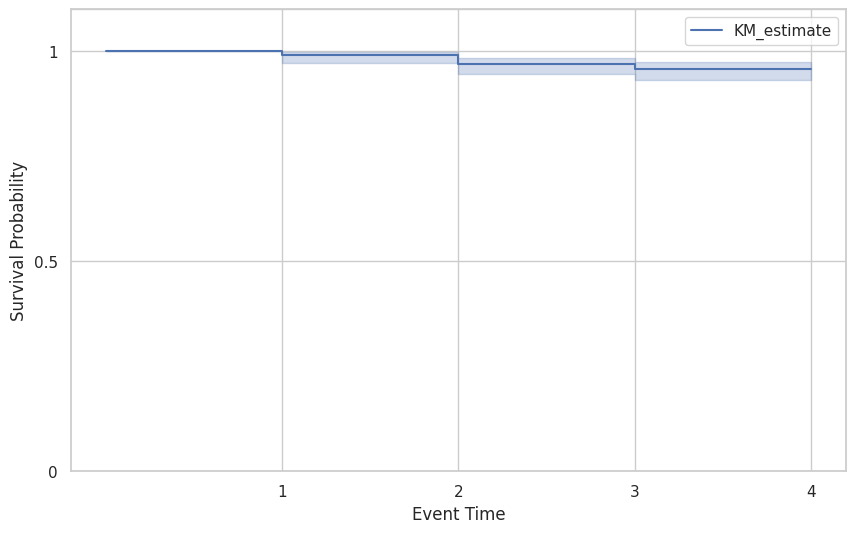

,Event Time,Number of Individuals,Number of Events,Survival Probability,Lower CI,Upper CI
0,0.0,338,0,1.000000,1.000000,1.000000
1,1.0,338,3,0.991124,0.972736,0.997129
2,2.0,335,7,0.970414,0.945712,0.983971
3,3.0,328,4,0.958580,0.931062,0.975259
4,4.0,324,0,0.958580,0.931062,0.975259


In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
# Assuming 'data' is your dataset with columns 'Level' and 'Churn'

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['Churn_Level'], data['Churn'])

# Initial number of censored individuals
initial_censored = 338

# Calculate number of censored individuals (did not churn) at each event time
n_individuals = len(data)
censored_counts = [initial_censored]

for i in range(1, len(kmf.timeline)):
    churned_count = kmf.event_table.iloc[i-1]['observed']  # Number of events (churns) at current event time
    censored_count = censored_counts[i-1] - churned_count
    censored_counts.append(censored_count)

# Extract event counts (number of churns) at each event time
event_counts = kmf.event_table['observed'].values

# Extract survival probabilities
survival_probs = kmf.survival_function_.iloc[:, 0].values

# Confidence intervals from Kaplan-Meier estimator
confidence_intervals = kmf.confidence_interval_survival_function_

# Create a DataFrame to display the information
table_data = {
    'Event Time': kmf.timeline,
    'Number of Individuals': censored_counts,
    'Number of Events': event_counts,

    'Survival Probability': survival_probs,
    'Lower CI': confidence_intervals['KM_estimate_lower_0.95'].values,
    'Upper CI': confidence_intervals['KM_estimate_upper_0.95'].values
}

df = pd.DataFrame(table_data)



# Plotting the survival curves using Kaplan-Meier Estimator
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
# plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1

# Set custom y-axis ticks and labels
plt.yticks([0, 0.5, 1,1.1], ['0', '0.5', '1',''])
plt.xticks([ 1, 2,3,4,4.2], ['1', '2', '3','4',''])

plt.xlabel('Event Time')
plt.ylabel('Survival Probability')
plt.show()

# Print the DataFrame
df


<lifelines.CoxPHFitter: fitted with 338 total observations, 324 right-censored observations>
             duration col = 'Churn_Level'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 338
number of events observed = 14
   partial log-likelihood = -74.21
         time fit was run = 2024-08-01 09:42:01 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
Gender                            0.87       2.39       0.58            -0.26             2.00                 0.77                 7.41
Residence                         0.69       1.99       0.62            -0.54             1.91                 0.59                 6.74
Usage_Freq                       -0.10       0.91       0.19            -0.46             0.27                 0.63                 1.31
Network_Strength                  0.04       1.04       0.25            -0.45             0.53                 0.64                 1.70
Voice_Calls                      -0.63       0.53       0.58            -1.77             0.51                 0.17                 1.67
Mobile_Data_Internet              0.64       1.89       1.06            -1.44             2.72                 0.24                15.15
SMS_Text_Messaging                0.21       1.23       0.57            -0.92             1.34                 0.40                 3.81
Data_Exhaustion                  -1.34       0.26       0.55            -2.42            -0.26                 0.09                 0.77
Multiple_Networks                 0.57       1.77       1.06            -1.51             2.66                 0.22                14.26
Poor_Network_Quality_Coverage     0.95       2.59       0.68            -0.38             2.29                 0.68                 9.84
Unsatisfactory_Customer_Service  -0.62       0.54       0.61            -1.81             0.58                 0.16                 1.78
High_Costs_Pricing                0.49       1.63       0.59            -0.67             1.65                 0.51                 5.23
Monthly_Data_Usage                0.03       1.03       0.26            -0.47             0.53                 0.62                 1.69

                                  cmp to     z    p   -log2(p)
covariate                                                     
Gender                              0.00  1.51 0.13       2.92
Residence                           0.00  1.10 0.27       1.88
Usage_Freq                          0.00 -0.52 0.60       0.74
Network_Strength                    0.00  0.15 0.88       0.19
Voice_Calls                         0.00 -1.08 0.28       1.83
Mobile_Data_Internet                0.00  0.60 0.55       0.87
SMS_Text_Messaging                  0.00  0.37 0.71       0.49
Data_Exhaustion                     0.00 -2.43 0.02       6.05
Multiple_Networks                   0.00  0.54 0.59       0.76
Poor_Network_Quality_Coverage       0.00  1.40 0.16       2.63
Unsatisfactory_Customer_Service     0.00 -1.01 0.31       1.68
High_Costs_Pricing                  0.00  0.83 0.41       1.29
Monthly_Data_Usage                  0.00  0.11 0.92       0.13
---
Concordance = 0.74
Partial AIC = 174.41
log-likelihood ratio test = 14.09 on 13 df
-log2(p) of ll-ratio test = 1.44

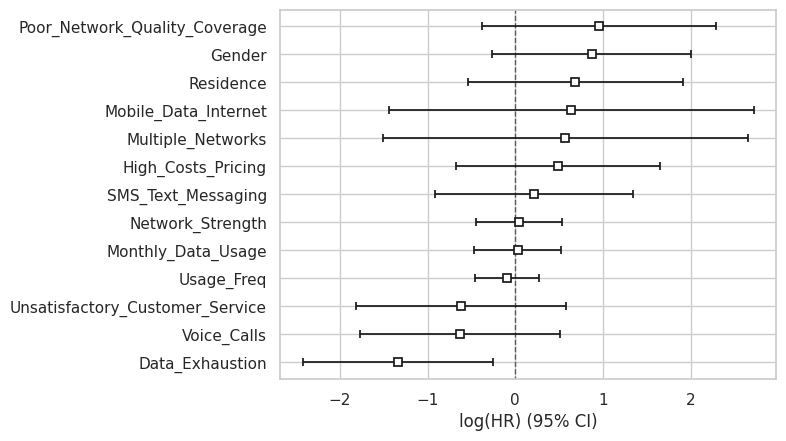

In [ ]:
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()
# data = data.drop(columns=['High_Costs_Pricing','Multiple_Networks','Other_Networks_Better_Services','Poor_Network_Quality_Coverage'])
# data = data.drop(columns='Poor_Network_Quality_Coverage')

# Fit the model
cph.fit(data, duration_col='Churn_Level', event_col='Churn')

# Display the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
# plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()


In [ ]:
# data['Level'] = data['Level']/100

# data

In [ ]:
# import pandas as pd
# from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
# import numpy as np

# # Sample data
# data = pd.DataFrame({
#     'Churn_Level': np.random.exponential(1, 100),
#     'Churn': np.random.randint(0, 2, 100)
# })

# # Instantiate each AFT fitter
# weibull_aft = WeibullAFTFitter()
# lognormal_aft = LogNormalAFTFitter()
# loglogistic_aft = LogLogisticAFTFitter()

# # Fit to data and collect AIC, BIC, and Hanna-Quinn values
# aft_metrics = {}
# for model in [weibull_aft, lognormal_aft, loglogistic_aft]:
#     model.fit(data, duration_col='Churn_Level', event_col='Churn')
#     aic = model.AIC_
#     bic = model.BIC_  # You can get BIC directly from lifelines
#     n = len(data)
#     k = len(model.params_)

#     # Hanna-Quinn criterion calculation
#     hqc = np.log(n) * k * np.log(np.log(n)) + 2 * k * np.log(n)

#     aft_metrics[model.__class__.__name__] = {
#         'AIC': aic,
#         'BIC': bic,
#         'Hanna-Quinn': hqc
#     }

# # Create a DataFrame from the metrics
# metrics_df = pd.DataFrame(aft_metrics).T
# metrics_df.index.name = 'Model'
# metrics_df = metrics_df.reset_index()

# print("Model Comparison Metrics:")
# print(metrics_df)

# # Find the model with the lowest AIC, BIC, and Hanna-Quinn
# best_aft_model_aic = metrics_df.loc[metrics_df['AIC'].idxmin(), 'Model']
# best_aft_model_bic = metrics_df.loc[metrics_df['BIC'].idxmin(), 'Model']
# best_aft_model_hqc = metrics_df.loc[metrics_df['Hanna-Quinn'].idxmin(), 'Model']

# print(f"\nThe AFT model with the lowest AIC is: {best_aft_model_aic}")
# print(f"The AFT model with the lowest BIC is: {best_aft_model_bic}")
# print(f"The AFT model with the lowest Hanna-Quinn is: {best_aft_model_hqc}")


In [ ]:
from lifelines import LogNormalAFTFitter
weibull_aft = LogNormalAFTFitter()
weibull_aft.fit(data, duration_col='Churn_Level', event_col='Churn')
weibull_aft.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 338 total observations, 324 right-censored observations>
             duration col = 'Churn_Level'
                event col = 'Churn'
   number of observations = 338
number of events observed = 14
           log-likelihood = -69.526
         time fit was run = 2024-08-01 09:42:01 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    Data_Exhaustion                  1.031      2.803      0.490            0.071            1.991                1.073                7.320
       Gender                          -0.493      0.611      0.444           -1.363            0.378                0.256                1.459
       High_Costs_Pricing              -0.375      0.687      0.439           -1.236            0.486                0.291                1.626
       Mobile_Data_Internet            -0.462      0.630      0.743           -1.918            0.994                0.147                2.701
       Monthly_Data_Usage              -0.001      0.999      0.179           -0.353            0.351                0.703                1.420
       Multiple_Networks               -0.354      0.702      0.748           -1.820            1.111                0.162                3.038
       Network_Strength                -0.093      0.911      0.181           -0.447            0.261                0.639                1.298
       Poor_Network_Quality_Coverage   -0.413      0.662      0.458           -1.311            0.486                0.270                1.625
       Residence                       -0.561      0.570      0.509           -1.559            0.436                0.210                1.546
       SMS_Text_Messaging              -0.095      0.910      0.414           -0.906            0.717                0.404                2.048
       Unsatisfactory_Customer_Service  0.458      1.581      0.455           -0.433            1.350                0.648                3.857
       Usage_Freq                       0.106      1.112      0.137           -0.162            0.373                0.850                1.453
       Voice_Calls                      0.556      1.744      0.448           -0.321            1.434                0.725                4.195
       Intercept                        4.388     80.492      1.636            1.182            7.595                3.260             1987.610
sigma_ Intercept                        0.421      1.523      0.242           -0.053            0.894                0.949                2.445

                                         cmp to      z     p   -log2(p)
param  covariate                                                       
mu_    Data_Exhaustion                    0.000  2.105 0.035      4.824
       Gender                             0.000 -1.110 0.267      1.904
       High_Costs_Pricing                 0.000 -0.854 0.393      1.346
       Mobile_Data_Internet               0.000 -0.622 0.534      0.906
       Monthly_Data_Usage                 0.000 -0.005 0.996      0.005
       Multiple_Networks                  0.000 -0.474 0.636      0.654
       Network_Strength                   0.000 -0.517 0.605      0.725
       Poor_Network_Quality_Coverage      0.000 -0.900 0.368      1.442
       Residence                          0.000 -1.104 0.270      1.890
       SMS_Text_Messaging                 0.000 -0.228 0.819      0.287
       Unsatisfactory_Customer_Service    0.000  1.008 0.314      1.673
       Usage_Freq                         0.000  0.774 0.439      1.188
       Voice_Calls                        0.000  1.243 0.214      2.224
       Intercept                          0.000  2.682 0.007      7.095
sigma_ Intercept                          0.000  1.742 0.082     

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

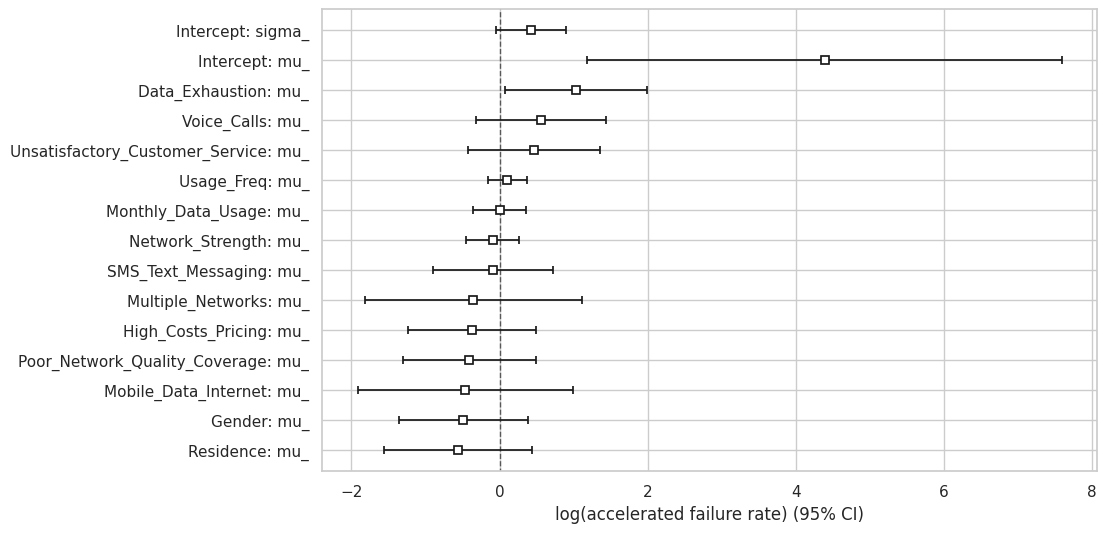

In [ ]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()


In [ ]:
# from lifelines import CoxPHFitter

# # Initialize the Cox Proportional Hazards model
# cph = CoxPHFitter()

# # Fit the model
# cph.fit(data, duration_col='Level', event_col='Churn')

# # Display the summary
# cph.print_summary()

# # Plot the coefficients
# cph.plot()
# plt.title('Cox Proportional Hazards Model Coefficients')
# plt.show()


In [ ]:
# Check proportional hazards assumption
cph.check_assumptions(data, p_value_threshold=0.05)

# Interpretation and validation
# (This will involve checking the summary output, coefficients, and assumption checks)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 338 total observations, 324 right-censored observations>
         test_name = proportional_hazard_test

---
                                      test_statistic    p  -log2(p)
Data_Exhaustion                 km              0.81 0.37      1.44
                                rank            0.36 0.55      0.86
Gender                          km              3.96 0.05      4.42
                                rank            1.23 0.27      1.91
High_Costs_Pricing              km              0.05 0.82      0.29
                                rank            0.04 0.84      0.24
Mobile_Data_Internet            km              1.07 0.30      1.73
                                rank            2.48 0.12      3.12
Monthly_Data_Usage              km              0.16 0.69      0.54
                                rank            0.08 0.77      0.38
Multiple_Networks               km              0.01 0.94      0.10
                                rank            0.50 0.48      1.06
Network_Strength                km              2.69 0.10      3.30
                                rank            3.00 0.08      3.58
Poor_Network_Quality_Coverage   km              6.02 0.01      6.14
                                rank            2.91 0.09      3.50
Residence                       km              4.24 0.04      4.66
                                rank            3.35 0.07      3.89
SMS_Text_Messaging              km              0.01 0.94      0.09
                                rank            0.97 0.33      1.62
Unsatisfactory_Customer_Service km              0.16 0.69      0.53
                                rank            0.50 0.48      1.06
Usage_Freq                      km              1.40 0.24      2.08
                                rank            1.98 0.16      2.65
Voice_Calls                     km              1.35 0.25      2.03
                                rank            0.47 0.49      1.02



1. Variable 'Gender' failed the non-proportional test: p-value is 0.0466.

   Advice: with so few unique values (only 2), you can include `strata=['Gender', ...]` in the call
in `.fit`. See documentation in link [E] below.

2. Variable 'Residence' failed the non-proportional test: p-value is 0.0396.

   Advice: with so few unique values (only 2), you can include `strata=['Residence', ...]` in the
call in `.fit`. See documentation in link [E] below.

3. Variable 'Poor_Network_Quality_Coverage' failed the non-proportional test: p-value is 0.0142.

   Advice: with so few unique values (only 2), you can include
`strata=['Poor_Network_Quality_Coverage', ...]` in the call in `.fit`. See documentation in link [E]
below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.rea

[]

In [ ]:
import pandas as pd
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import numpy as np

# Sample data
data = pd.DataFrame({
    'Churn_Level': np.random.exponential(1, 100),
    'Churn': np.random.randint(0, 2, 100)
})

# Instantiate each AFT fitter
weibull_aft = WeibullAFTFitter()
lognormal_aft = LogNormalAFTFitter()
loglogistic_aft = LogLogisticAFTFitter()

# Fit to data and collect AIC, BIC, and Hanna-Quinn values
aft_metrics = {}
for model in [weibull_aft, lognormal_aft, loglogistic_aft]:
    model.fit(data, duration_col='Churn_Level', event_col='Churn')
    aic = model.AIC_
    bic = model.BIC_  # You can get BIC directly from lifelines
    n = len(data)
    k = len(model.params_)

    # Hanna-Quinn criterion calculation
    hqc = np.log(n) * k * np.log(np.log(n)) + 2 * k * np.log(n)

    aft_metrics[model.__class__.__name__] = {
        'AIC': aic,
        'BIC': bic,
        'Hanna-Quinn': hqc
    }

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(aft_metrics).T
metrics_df.index.name = 'Model'
metrics_df = metrics_df.reset_index()

print("Model Comparison Metrics:")
print(metrics_df)

# Find the model with the lowest AIC, BIC, and Hanna-Quinn
best_aft_model_aic = metrics_df.loc[metrics_df['AIC'].idxmin(), 'Model']
best_aft_model_bic = metrics_df.loc[metrics_df['BIC'].idxmin(), 'Model']
best_aft_model_hqc = metrics_df.loc[metrics_df['Hanna-Quinn'].idxmin(), 'Model']

print(f"\nThe AFT model with the lowest AIC is: {best_aft_model_aic}")
print(f"The AFT model with the lowest BIC is: {best_aft_model_bic}")
print(f"The AFT model with the lowest Hanna-Quinn is: {best_aft_model_hqc}")


Model Comparison Metrics:
                  Model         AIC         BIC  Hanna-Quinn
0      WeibullAFTFitter  182.568721  187.779061    32.486525
1    LogNormalAFTFitter  175.138211  180.348551    32.486525
2  LogLogisticAFTFitter  176.518119  181.728460    32.486525

The AFT model with the lowest AIC is: LogNormalAFTFitter
The AFT model with the lowest BIC is: LogNormalAFTFitter
The AFT model with the lowest Hanna-Quinn is: WeibullAFTFitter


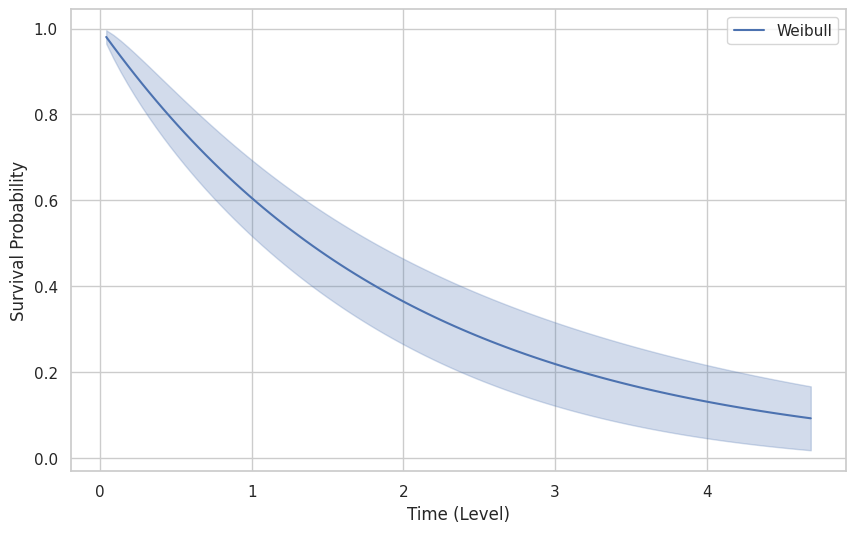

In [ ]:
from lifelines import  WeibullFitter


# Fit the Weibull model
wf = WeibullFitter()
wf.fit(durations=data['Churn_Level'], event_observed=data['Churn'])

# Plot the survival functions of both models
plt.figure(figsize=(10, 6))
wf.plot_survival_function(label='Weibull')
plt.xlabel('Time (Level)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


In [ ]:
# # Lognormal model summary
# lnf.print_summary()

# # Weibull model summary
# wf.print_summary()

# # Goodness-of-fit metrics
# lnf_aic = lnf.AIC_
# wf_aic = wf.AIC_

# lnf_aic, wf_aic


In [ ]:
# # Get the AIC value of the Cox PH model
# cox_aic = cph.AIC_partial_

# # AIC values of all models
# aic_values = {
#     'Cox PH': cox_aic,
#     'Lognormal': lnf.AIC_,
#     'Weibull': wf.AIC_
# }

# aic_values


In [ ]:
# cox_cindex

In [ ]:
# from lifelines.utils import concordance_index

# # Ensure 'Level' and 'Churn' columns are 1-dimensional
# level = data['Level'].values.flatten()
# churn = data['Churn'].values.flatten()

# # Calculate the C-index for Cox PH model
# cox_predictions = -cph.predict_partial_hazard(data).values.flatten()
# cox_cindex = concordance_index(level, cox_predictions, churn)

# # Calculate the C-index for Lognormal model
# lognormal_predictions = -lnf.predict(data[['Level']]).values.flatten()
# lognormal_cindex = concordance_index(level, lognormal_predictions, churn)

# # Calculate the C-index for Weibull model
# weibull_predictions = -wf.predict(data[['Level']]).values.flatten()
# weibull_cindex = concordance_index(level, weibull_predictions, churn)

# cox_cindex, lognormal_cindex, weibull_cindex


In [ ]:
# print(f"Level shape: {level.shape}")
# print(f"Churn shape: {churn.shape}")
# print(f"Cox Predictions shape: {cox_predictions.shape}")
# print(f"Lognormal Predictions shape: {lognormal_predictions.shape}")
# print(f"Weibull Predictions shape: {weibull_predictions.shape}")
